<a href="https://colab.research.google.com/github/Karlajack/pydata_analysis/blob/main/pandasweeklyproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Apple Stock**

Step 1. Import the necessary libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
from pandas_datareader import data, wb
import pandas_datareader.data as web


Step 2. Import the dataset from this address

https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv

Step 3. Assign it to a variable apple

In [60]:
url='https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/09_Time_Series/Apple_Stock/appl_1980_2014.csv'
apple=pd.read_csv(url)
apple.head()

,Date,Open,High,Low,Close,Volume,Adj Close
0,2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
1,2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2,2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
3,2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
4,2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52


Step 4. Check out the type of the columns

In [ ]:
apple.dtypes

Date          object
Open         float64
High         float64
Low          float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

Step 5. Transform the Date column as a datetime type

In [61]:
apple['Date'] = pd.to_datetime(apple['Date'])

Step 6. Set the date as the index

In [62]:
apple = apple.set_index('Date')

apple.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2014-07-08,96.27,96.80,93.92,95.35,65130000,95.35
2014-07-07,94.14,95.99,94.10,95.97,56305400,95.97
2014-07-03,93.67,94.10,93.20,94.03,22891800,94.03
2014-07-02,93.87,94.06,93.09,93.48,28420900,93.48
2014-07-01,93.52,94.07,93.13,93.52,38170200,93.52



Step 7. Is there any duplicate dates?

In [ ]:
apple.index.is_unique

True

Step 8. Ops...it seems the index is from the most recent date. Make the first entry the oldest date.

In [36]:
apple.sort_index(ascending = True).head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-12,28.75,28.87,28.75,28.75,117258400,0.45
1980-12-15,27.38,27.38,27.25,27.25,43971200,0.42
1980-12-16,25.37,25.37,25.25,25.25,26432000,0.39
1980-12-17,25.87,26.00,25.87,25.87,21610400,0.40
1980-12-18,26.63,26.75,26.63,26.63,18362400,0.41


In [ ]:
Step 9. Get the last business day of each month

In [ ]:
apple_month = apple.resample('BM').mean()
apple_month



apple_month.head()

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
1980-12-31,30.481538,30.567692,30.443077,30.443077,2.586252e+07,0.473077
1981-01-30,31.754762,31.826667,31.654762,31.654762,7.249867e+06,0.493810
1981-02-27,26.480000,26.572105,26.407895,26.407895,4.231832e+06,0.411053
1981-03-31,24.937727,25.016818,24.836364,24.836364,7.962691e+06,0.387727
1981-04-30,27.286667,27.368095,27.227143,27.227143,6.392000e+06,0.423333


Step 10. What is the difference in days between the first day and the oldest

In [ ]:
(apple.index.max() - apple.index.min()).days

12261

Step 11. How many months in the data we have?

In [ ]:
apple_months = apple.resample('BM').mean()

len(apple_months.index)

404

Step 12. Plot the 'Adj Close' value. Set the size of the figure to 13.5 x 9 inches

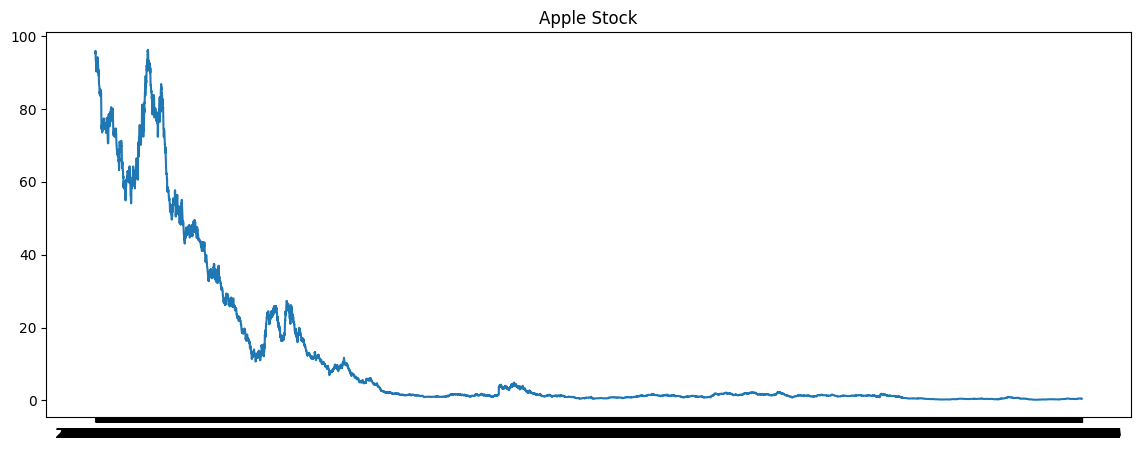

In [63]:
plt.figure(figsize=(14,5))
y=apple['Adj Close']
plt.plot(x,y)
plt.title("Apple Stock")
plt.show()






**Getting_Financial_Data**

Step 2. Create your time range (start and end variables). The start date should be 01/01/2015 and the end should today (whatever your today is)

In [17]:
start = dt.datetime(2015, 1, 1)

end = dt.datetime.today()

start
end



datetime.datetime(2024, 4, 12, 18, 50, 42, 804211)

Step 3. Select the Apple, Tesla, Twitter, IBM, LinkedIn stocks symbols and assign them to a variable called stocks

In [19]:
stocks = ['AAPL', 'TSLA', 'IBM', 'LNKD']
stocks

['AAPL', 'TSLA', 'IBM', 'LNKD']

Step 4. Read the data from google, assign to df and print it

In [96]:



df_apple= web.DataReader('AAPL', 'stooq', start, end)
df_tsla= web.DataReader('TSLA', 'stooq', start, end)
df_ibm= web.DataReader('IBM', 'stooq', start, end)
df_lnkd = web.DataReader('LNKD', 'stooq', start, end)


df_apple['stock'] = 'AAPL'
df_tsla['stock'] = 'TSLA'
df_ibm['stock'] = 'IBM'
df_lnkd['stock'] = 'MSFT'

df = pd.concat([df_apple,df_tsla,df_ibm,df_lnkd])

df['Date'] = df.index
df = df.set_index(['Date','stock'],drop=True)
df

df







,,Open,High,Low,Close,Volume
Date,stock,,,,,
2024-04-11,AAPL,168.340,175.460,168.160,175.040,9.107028e+07
2024-04-10,AAPL,168.800,169.090,167.110,167.780,4.970934e+07
2024-04-09,AAPL,168.700,170.080,168.350,169.670,4.245121e+07
2024-04-08,AAPL,169.030,169.200,168.240,168.450,3.742551e+07
2024-04-05,AAPL,169.590,170.390,168.950,169.580,4.210483e+07
...,...,...,...,...,...,...
2015-01-08,IBM,110.387,112.377,109.909,111.928,6.001319e+06
2015-01-07,IBM,111.050,111.050,108.854,109.567,6.653528e+06
2015-01-06,IBM,112.836,113.041,109.635,110.269,8.698870e+06


Step 5. What is the type of structure of df ?

Step 6. Print all the Items axis values

In [97]:
df.items

<bound method DataFrame.items of                      Open     High      Low    Close        Volume
Date       stock                                                  
2024-04-11 AAPL   168.340  175.460  168.160  175.040  9.107028e+07
2024-04-10 AAPL   168.800  169.090  167.110  167.780  4.970934e+07
2024-04-09 AAPL   168.700  170.080  168.350  169.670  4.245121e+07
2024-04-08 AAPL   169.030  169.200  168.240  168.450  3.742551e+07
2024-04-05 AAPL   169.590  170.390  168.950  169.580  4.210483e+07
...                   ...      ...      ...      ...           ...
2015-01-08 IBM    110.387  112.377  109.909  111.928  6.001319e+06
2015-01-07 IBM    111.050  111.050  108.854  109.567  6.653528e+06
2015-01-06 IBM    112.836  113.041  109.635  110.269  8.698870e+06
2015-01-05 IBM    113.948  113.948  112.465  112.709  6.906071e+06
2015-01-02 IBM    113.958  115.383  113.773  114.544  7.819521e+06

[7002 rows x 5 columns]>

Step 7. Good, now we know the data avaiable. Create a dataFrame called vol, with the Volume values.

In [98]:
vol = df['Volume']
vol.head()

Date        stock
2024-04-11  AAPL     91070275.0
2024-04-10  AAPL     49709336.0
2024-04-09  AAPL     42451209.0
2024-04-08  AAPL     37425513.0
2024-04-05  AAPL     42104826.0
Name: Volume, dtype: float64

Step 8. Aggregate the data of Volume to weekly
Hint: Be careful to not sum data from the same week of 2015 and other years.

In [125]:
vol['year'] = vol.index.year
vol['month'] = vol.index.month


month = vol.groupby(['month','year']).sum()
month.head(10)


stock               AAPL           IBM          TSLA  Week
month year                                                
1     2015  4.019408e+09  1.195580e+08  1.196409e+09     4
      2016  5.842961e+09  1.914477e+08  1.223866e+09     5
      2017  2.309450e+09  1.160580e+08  1.623120e+09     5
      2018  2.224419e+09  1.670308e+08  1.625338e+09     4
      2019  2.873980e+09  1.283850e+08  2.206477e+09     4
      2020  2.366263e+09  1.004912e+08  5.142907e+09     4
      2021  2.714175e+09  2.097284e+08  2.561129e+09     5
      2022  2.347536e+09  1.678522e+08  2.088778e+09     5
      2023  1.620947e+09  1.034713e+08  4.279222e+09     5
      2024  1.029018e+09  1.103297e+08  2.005997e+09     4

Step 9. Find all the volume traded in the year of 2015

In [113]:
vol['year'] = vol.index.year

year = vol.groupby(['year']).sum()
year

stock,AAPL,IBM,TSLA,Week
year,,,,
2015,5.732441e+10,1.521832e+09,1.620143e+10,339
2016,3.970223e+10,1.378219e+09,1.549254e+10,335
2017,2.871660e+10,1.394152e+09,2.393136e+10,346
2018,3.545983e+10,1.693877e+09,3.232232e+10,344
2019,2.903802e+10,1.124326e+09,3.450255e+10,342
2020,4.032261e+10,1.585310e+09,5.710182e+10,339
2021,2.312133e+10,1.448534e+09,2.088080e+10,336
2022,2.216929e+10,1.297906e+09,2.129217e+10,335
2023,1.511544e+10,1.124386e+09,3.515322e+10,346


BONUS: Create your own question and answer it.